# Open Forest Observatory EDA

In this notebook, we will investigate the OFO plots and their field level data. Our intention is to decide which plots (with openly accessible data, aka unembargoed) may be suitable for RS HSI tree species model training, and/or validation. 

There are two files we will be looking at, 

In [1]:
import numpy as np
import pandas as pd
import geopandas as gdp
import matplotlib.pyplot as plt

In [2]:
ofo_trees_df = gdp.read_file('../data/ofo/ofo_ground-reference_trees.gpkg')
ofo_plots_df = gdp.read_file('../data/ofo/ofo_ground-reference_plots.gpkg')

In [3]:
ofo_plots_df

,plot_id,project_id,project_name,investigator_names,investigator_contacts,license_short,license,hyperplot_id,survey_date_approx,survey_date,...,min_dbh_live,max_dbh_of_primary_trees,min_ht,min_dbh_ohvis,min_ht_ohvis,plot_lon,plot_lat,num_ohvis_trees_excluded,contributor_plot_id,geometry
0,0070,6.0,STEF2007,"Knapp, Eric E.; Carlson, Robert L",eric.e.knapp@usda.gov,Public domain,These data were collected using funding from t...,None,True,2008.0,...,NaN,NaN,NaN,NaN,NaN,38.177382,-120.001294,NaN,MOC 9,"MULTIPOLYGON (((-120.00103 38.17605, -120.0011..."
1,0081,8.0,SJGEO2018,Dr. Marko Spasojevic,markos@ucr.edu,CC BY 4.0,"CC BY 4.0; Spasojevic, Marko et al. (2023). Da...",None,True,201910.0,...,NaN,NaN,1.3,NaN,1.3,33.810270,-116.767450,NaN,None,"POLYGON ((-116.76897 33.81007, -116.76767 33.8..."
2,0083,9.0,JLHZ2019,"James Lamping, Harold Zald","jlamping@uoregon.edu, Harold.Zald@usda.gov",CC BY 4.0,CC BY 4.0,None,True,202008.0,...,NaN,NaN,NaN,NaN,NaN,40.777895,-123.867931,NaN,MC1,"MULTIPOLYGON (((-123.86914 40.77879, -123.8691..."
3,0084,9.0,JLHZ2019,"James Lamping, Harold Zald","jlamping@uoregon.edu, Harold.Zald@usda.gov",CC BY 4.0,CC BY 4.0,None,True,201907.0,...,NaN,NaN,NaN,NaN,NaN,37.099000,-119.735000,NaN,OW2,"MULTIPOLYGON (((-119.73617 37.09988, -119.7361..."
4,0087,9.0,JLHZ2019,"James Lamping, Harold Zald","jlamping@uoregon.edu, Harold.Zald@usda.gov",CC BY 4.0,CC BY 4.0,None,True,201906.0,...,NaN,NaN,NaN,NaN,NaN,36.965150,-119.022221,NaN,UN3,"MULTIPOLYGON (((-119.02333 36.96424, -119.0210..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,0251,19.0,Cambria2021,"Dr. Sarah Bisbing, Conor Phelan","sbisbing@unr.edu, cphelan@unr.edu",CC BY 4.0,CC BY 4.0,0010,True,20210120.0,...,NaN,12.49,NaN,NaN,NaN,-121.079357,35.537974,NaN,RM19_small,"POLYGON ((-121.07927 35.53799, -121.07927 35.5..."
254,0252,19.0,Cambria2021,"Dr. Sarah Bisbing, Conor Phelan","sbisbing@unr.edu, cphelan@unr.edu",CC BY 4.0,CC BY 4.0,0011,True,20210126.0,...,NaN,12.49,NaN,NaN,NaN,-121.075777,35.537675,NaN,RM20_small,"POLYGON ((-121.07569 35.53769, -121.07569 35.5..."
255,0253,19.0,Cambria2021,"Dr. Sarah Bisbing, Conor Phelan","sbisbing@unr.edu, cphelan@unr.edu",CC BY 4.0,CC BY 4.0,0012,True,20210115.0,...,NaN,12.49,NaN,NaN,NaN,-121.082345,35.538642,NaN,RM21_small,"POLYGON ((-121.08226 35.53866, -121.08226 35.5..."
256,0254,19.0,Cambria2021,"Dr. Sarah Bisbing, Conor Phelan","sbisbing@unr.edu, cphelan@unr.edu",CC BY 4.0,CC BY 4.0,0013,True,20210119.0,...,NaN,12.49,NaN,NaN,NaN,-121.080338,35.539659,NaN,RM22_small,"POLYGON ((-121.08025 35.53968, -121.08025 35.5..."


In [4]:
ofo_plots_df.columns

Index(['plot_id', 'project_id', 'project_name', 'investigator_names',
       'investigator_contacts', 'license_short', 'license', 'hyperplot_id',
       'survey_date_approx', 'survey_date', 'plot_shape', 'plot_area_ha',
       'subplots', 'subplot_shape', 'subplot_area', 'top_species',
       'height_measured', 'includes_snags', 'includes_damage',
       'damage_codes_inspected', 'min_dbh', 'min_dbh_live',
       'max_dbh_of_primary_trees', 'min_ht', 'min_dbh_ohvis', 'min_ht_ohvis',
       'plot_lon', 'plot_lat', 'num_ohvis_trees_excluded',
       'contributor_plot_id', 'geometry'],
      dtype='object')

There are 255 plots in the OFO dataset, but we know that a fair number of these are spatially small (as small as a single tree). Let's constrict this dataset to plots that are greater than 0.5 hectare in area (assuming a square plot, this is equivalent to a side length of 70 meters). This should give us plots that could hypothetically contain a full EnMAP image pixel (30x30m). 

In [5]:
(ofo_plots_df.plot_area_ha > 0.5).sum()

np.int64(33)

In [6]:
ofo_plots_df.license

0      These data were collected using funding from t...
1      CC BY 4.0; Spasojevic, Marko et al. (2023). Da...
2                                              CC BY 4.0
3                                              CC BY 4.0
4                                              CC BY 4.0
                             ...                        
253                                            CC BY 4.0
254                                            CC BY 4.0
255                                            CC BY 4.0
256                                            CC BY 4.0
257                                            CC BY 4.0
Name: license, Length: 258, dtype: object

Additionally, some of these plots are embargoed. While the data licenses vary, I'm fairly sure the only plots that are embargoed are Harold Zald's plots 0082-0087. Let's restrict our data to only the open data (after visulizing all large plots).

In [17]:
import geopandas as gpd

ofo_plots_df = gpd.read_file('../data/ofo/ofo_ground-reference_plots.gpkg')

large_plots_df = ofo_plots_df[ofo_plots_df.plot_area_ha > 0.5].reset_index(drop=True)

large_plots_df = large_plots_df[large_plots_df['plot_id'].notna()].reset_index(drop=True)

In [18]:
# large_plots_df = ofo_plots_df[ofo_plots_df.plot_area_ha > 0.5].reset_index(drop=True)

# # Ensure embargo list is string
# embargoed_plot_id_l = ['00' + str(i) for i in np.arange(82, 88)]

# # Drop rows with NaN plot_id, then exclude embargoed plot_ids
# large_public_plots_df = large_plots_df[
#     large_plots_df['plot_id'].notna() & 
#     (~large_plots_df['plot_id'].isin(embargoed_plot_id_l))
# ].reset_index(drop=True)


# plot_id_l = list(large_plots_df.plot_id)
# public_plot_id_l = list(large_public_plots_df.plot_id)

# print(large_plots_df.license_short.value_counts())

# print('Public plot ids:', public_plot_id_l)

In [19]:
large_plots_df.iloc[0]

plot_id                                                                  0070
project_id                                                                6.0
project_name                                                         STEF2007
investigator_names                          Knapp, Eric E.; Carlson, Robert L
investigator_contacts                                   eric.e.knapp@usda.gov
license_short                                                   Public domain
license                     These data were collected using funding from t...
hyperplot_id                                                             None
survey_date_approx                                                       True
survey_date                                                            2008.0
plot_shape                                                        rectangular
plot_area_ha                                                          4.27306
subplots                                                        

In [20]:
large_plots_df.geometry

0     MULTIPOLYGON (((-120.00103 38.17605, -120.0011...
1     POLYGON ((-116.76897 33.81007, -116.76767 33.8...
2     MULTIPOLYGON (((-123.86914 40.77879, -123.8691...
3     MULTIPOLYGON (((-119.73617 37.09988, -119.7361...
4     MULTIPOLYGON (((-119.02333 36.96424, -119.0210...
5     MULTIPOLYGON (((-119.02104 36.95588, -119.0188...
6     MULTIPOLYGON (((-119.99703 38.17774, -119.9982...
7     MULTIPOLYGON (((-119.99718 38.1806, -119.99563...
8     MULTIPOLYGON (((-120.01534 38.18483, -120.0177...
9     POLYGON ((-120.08843 38.96572, -120.08844 38.9...
10    POLYGON ((-120.00371 38.17453, -120.00487 38.1...
11    POLYGON ((-120.0064 38.1715, -120.00722 38.170...
12    POLYGON ((-119.98344 38.17949, -119.98348 38.1...
13    POLYGON ((-119.9875 38.17795, -119.98729 38.17...
14    POLYGON ((-119.98443 38.17836, -119.98638 38.1...
15    POLYGON ((-120.00428 38.17598, -120.00434 38.1...
16    POLYGON ((-119.99177 38.17777, -119.99323 38.1...
17    POLYGON ((-120.00209 38.17601, -120.00298 

It looks like we can expect data for 12 of these plots in the ofo_ground-reference_plots.gpkg dataset. The other ones we will likely have to get by specific request (Harold Zald's plots).

In [21]:

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Polygon, MultiPolygon
import rasterio
from rasterio.plot import show as rio_show
from matplotlib.patches import Patch

def plot_centroids_colored_by_license(
    gdf, 
    bbox=None, 
    raster_path=None, 
    title="Plot Centroids Colored by License"
):
    projection = ccrs.PlateCarree()
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': projection})

    # Optional bounding box filtering
    if bbox:
        min_lon, max_lon, min_lat, max_lat = bbox
        gdf = gdf.cx[min_lon:max_lon, min_lat:max_lat]

    if gdf.empty:
        print("No plots inside bounding box.")
        return

    # Optional raster background
    if raster_path:
        with rasterio.open(raster_path) as src:
            rio_show(src, ax=ax, transform=src.transform)

    # Basemap features
    ax.add_feature(cfeature.LAND, alpha=0.2)
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)

    # Define color mapping
    color_map = {
        'Public domain': 'green',
        'CC BY 4.0': 'red'
    }

    # Plot centroids
    for _, row in gdf.iterrows():
        centroid = row.geometry.centroid
        plot_id = row.plot_id
        license_short = row.license_short
        color = color_map.get(license_short, 'gray')

        ax.plot(
            centroid.x, centroid.y,
            marker='o', color=color, markersize=8,
            markeredgecolor='black', transform=projection
        )

        ax.text(
            centroid.x, centroid.y, str(plot_id),
            fontsize=8, ha='center', va='center',
            transform=projection
        )

    if bbox:
        try:
            cartopy_crs = ccrs.epsg(gdf.crs.to_epsg())
        except Exception:
            cartopy_crs = projection  # fallback
        ax.set_extent(bbox, crs=cartopy_crs)
    else:
        bounds = gdf.total_bounds
        buffer_x = (bounds[2] - bounds[0]) * 0.05
        buffer_y = (bounds[3] - bounds[1]) * 0.05
        extent = [bounds[0] - buffer_x, bounds[2] + buffer_x,
                  bounds[1] - buffer_y, bounds[3] + buffer_y]
        ax.set_extent(extent, crs=projection)

    # Gridlines (lat/lon axes)
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, linestyle='--', alpha=0.6)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}

    # Legend
    legend_elements = [
        Patch(facecolor='green', edgecolor='black', label='Public domain'),
        Patch(facecolor='red', edgecolor='black', label='CC BY 4.0'),
        Patch(facecolor='gray', edgecolor='black', label='Other/Unknown')
    ]
    ax.legend(handles=legend_elements, loc='lower left')

    # Title
    ax.set_title(title, fontsize=14)
    plt.tight_layout()
    plt.show()


import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib.patches import Patch

def plot_centroids_with_basemap(gdf, bbox=None, title="Plot Centroids with Basemap", show_basemap=True):
    # Filter with bounding box if given
    if bbox:
        min_lon, max_lon, min_lat, max_lat = bbox
        gdf = gdf.cx[min_lon:max_lon, min_lat:max_lat]
    
    if gdf.empty:
        print("No data in bounding box.")
        return

    # Ensure CRS is 4326
    if gdf.crs is None:
        gdf = gdf.set_crs("EPSG:4326")

    # Project to Web Mercator for basemap
    gdf_web = gdf.to_crs(epsg=3857)
    gdf_web['centroid'] = gdf_web.geometry.centroid

    # Color mapping
    color_map = {
        'Public domain': 'green',
        'CC BY 4.0': 'red'
    }
    gdf_web['color'] = gdf['license_short'].map(color_map).fillna('gray')

    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot points at centroids
    gdf_web.set_geometry('centroid').plot(
        ax=ax, color=gdf_web['color'], edgecolor='black', markersize=60
    )

    # Label each point
    for _, row in gdf_web.iterrows():
        c = row['centroid']
        ax.text(c.x, c.y, str(row['plot_id']), ha='center', va='center', fontsize=8)

    # Add basemap if requested
    if show_basemap:
        ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager, crs="EPSG:3857", zoom=10)

    # Legend
    legend_elements = [
        Patch(facecolor='green', edgecolor='black', label='Public domain'),
        Patch(facecolor='red', edgecolor='black', label='CC BY 4.0'),
        Patch(facecolor='gray', edgecolor='black', label='Other/Unknown')
    ]
    ax.legend(handles=legend_elements, loc='lower left')

    ax.set_title(title)
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()



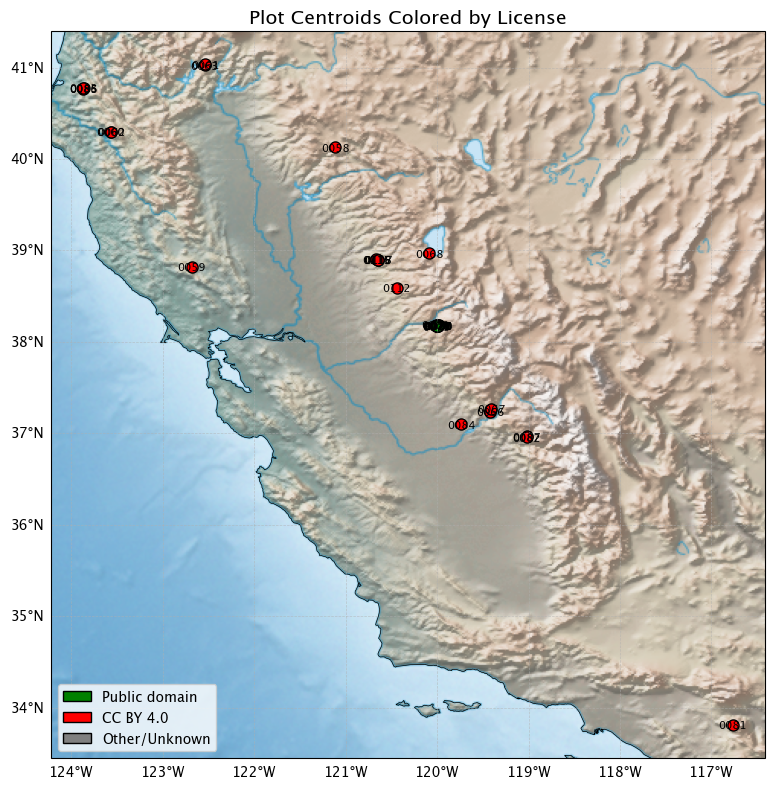

In [22]:
plot_centroids_colored_by_license(large_plots_df, raster_path='../../../rock_daisy/rock-daisy-viz/data/HYP_HR_SR_OB_DR/HYP_HR_SR_OB_DR.tif')#, bbox=[-125, -115, 32, 42])  # CA region, for example


In [23]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon, box
from matplotlib.patches import Patch
import contextily as ctx
import cartopy.crs as ccrs
from pyproj import Transformer

def plot_plot_polygons_with_labels(
    gdf,
    bbox=None,             # [min_lon, max_lon, min_lat, max_lat]
    center=None,           # (lon, lat)
    edge_km=None,          # for square window around center
    basemap_source=ctx.providers.OpenStreetMap.Mapnik,
    title="Plot Boundaries with Plot ID Labels"
):
    # Ensure CRS is set
    if gdf.crs is None:
        gdf = gdf.set_crs("EPSG:4326")

    transformer_to_3857 = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)

    # Handle extent definition
    if bbox:
        min_lon, max_lon, min_lat, max_lat = bbox
       
        bbox_geom = gpd.GeoSeries([box(min_lon, min_lat, max_lon, max_lat)], crs="EPSG:4326")

        gdf = gdf.clip(bbox_geom)
        x0, y0 = transformer_to_3857.transform(min_lon, min_lat)
        x1, y1 = transformer_to_3857.transform(max_lon, max_lat)
        extent = [x0, x1, y0, y1]

    elif center and edge_km:
        lon, lat = center
        x_center, y_center = transformer_to_3857.transform(lon, lat)
        half = edge_km * 500  # in meters
        extent = [x_center - half, x_center + half, y_center - half, y_center + half]

        # Filter to center window in original CRS
        degree_buffer = edge_km / 111  # very approximate
        min_lon, max_lon = lon - degree_buffer, lon + degree_buffer
        min_lat, max_lat = lat - degree_buffer, lat + degree_buffer
        gdf = gdf.cx[min_lon:max_lon, min_lat:max_lat]

    else:
        # Auto extent with buffer
        gdf_proj = gdf.to_crs(epsg=3857)
        bounds = gdf_proj.total_bounds
        dx, dy = bounds[2] - bounds[0], bounds[3] - bounds[1]
        buffer_x = dx * 0.05
        buffer_y = dy * 0.05
        extent = [bounds[0] - buffer_x, bounds[2] + buffer_x,
                  bounds[1] - buffer_y, bounds[3] + buffer_y]

    # Reproject data to EPSG:3857 for plotting
    gdf_proj = gdf.to_crs(epsg=3857)

    # Set up plot
    projection = ccrs.epsg(3857)
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': projection})

    # Plot polygons
    for _, row in gdf_proj.iterrows():
        geom = row.geometry
        plot_id = row.plot_id
        polygons = [geom] if isinstance(geom, Polygon) else geom.geoms

        for poly in polygons:
            xs, ys = poly.exterior.xy
            ax.fill(xs, ys, facecolor='lightgreen', edgecolor='black',
                    linewidth=1, alpha=0.5, transform=projection)

        # Label centroids
        centroid = geom.centroid
        ax.text(centroid.x, centroid.y, str(plot_id), fontsize=8,
                ha='center', va='center', transform=projection)

    # Apply exact extent
    ax.set_extent(extent, crs=projection)

    # Add basemap
    ctx.add_basemap(ax, source=basemap_source, crs="EPSG:3857", zoom=12)

    # Lat/lon gridlines
    gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(),
                      linewidth=0.5, linestyle='--', alpha=0.6)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}

    ax.set_title(title)
    plt.tight_layout()
    plt.show()


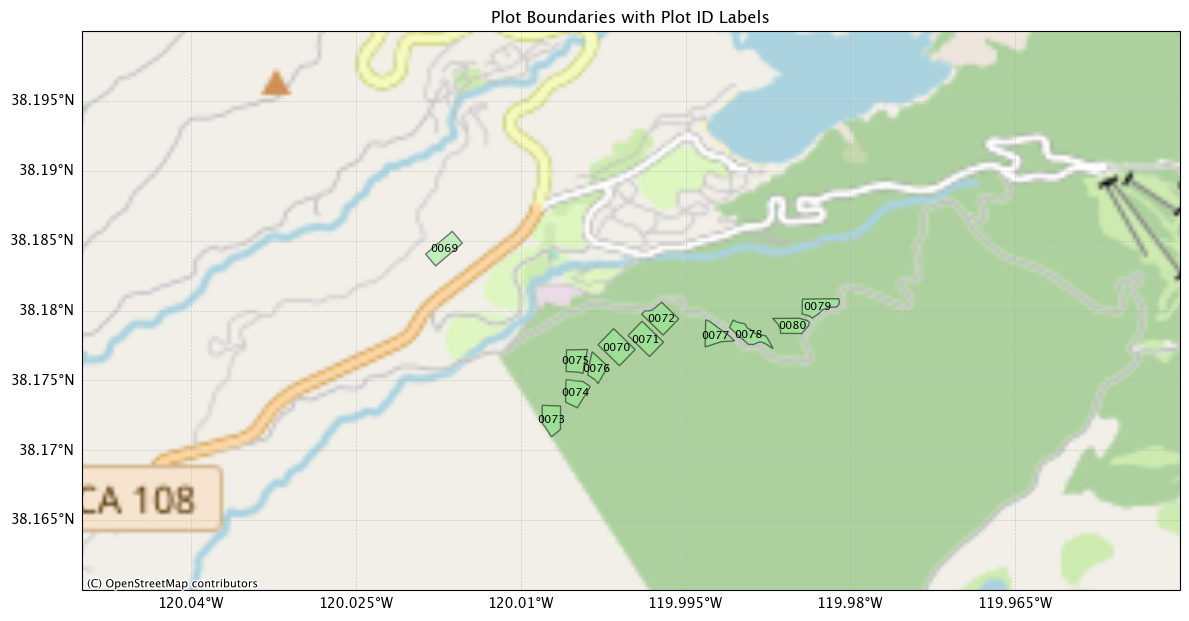

In [24]:
plot_plot_polygons_with_labels(
    large_plots_df,
    bbox=[-120.05, -119.95, 38.16, 38.2]
)


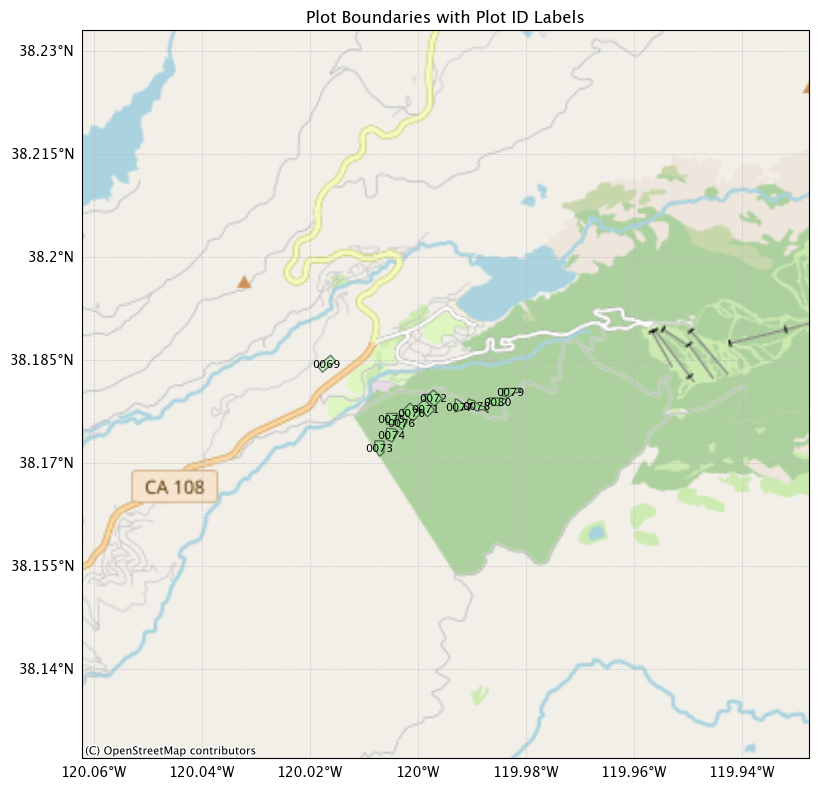

In [25]:
plot_plot_polygons_with_labels(
    large_plots_df,
    center=(-119.995, 38.18),  # lon, lat
    edge_km=15  # kilometers
)


In [30]:
large_plots_df[large_plots_df.plot_id == '0070']

,plot_id,project_id,project_name,investigator_names,investigator_contacts,license_short,license,hyperplot_id,survey_date_approx,survey_date,...,min_dbh_live,max_dbh_of_primary_trees,min_ht,min_dbh_ohvis,min_ht_ohvis,plot_lon,plot_lat,num_ohvis_trees_excluded,contributor_plot_id,geometry
0,0070,6.0,STEF2007,"Knapp, Eric E.; Carlson, Robert L",eric.e.knapp@usda.gov,Public domain,These data were collected using funding from t...,None,True,2008.0,...,NaN,NaN,NaN,NaN,NaN,38.177382,-120.001294,NaN,MOC 9,"MULTIPOLYGON (((-120.00103 38.17605, -120.0011..."


In [34]:
tree_70_df = ofo_trees_df[ofo_trees_df.plot_id == '0070'].reset_index(drop=True)
tree_70_df

,plot_id,subplot_id,height,height_allometric,height_above_plot_center,dbh,species_code,growth_form,live_dead,crown_position,...,crown_width_allometric,decay_class,damage_1,damage_2,damage_3,damage_4,damage_5,contributor_tree_id,notes,geometry
0,0070,NaN,36.576,NaN,NaN,63.754,PILA,tree,L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2124,NaN,POINT (-120.00128 38.17836)
1,0070,NaN,NaN,NaN,NaN,62.484,CADE27,tree,L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2125,NaN,POINT (-120.00125 38.17834)
2,0070,NaN,22.860,NaN,NaN,57.658,CADE27,tree,L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2126,NaN,POINT (-120.00129 38.17831)
3,0070,NaN,NaN,NaN,NaN,63.246,ABCO,tree,L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2127,NaN,POINT (-120.0013 38.17818)
4,0070,NaN,NaN,NaN,NaN,23.114,ABCO,tree,L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2128,NaN,POINT (-120.00132 38.17822)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4355,0070,NaN,NaN,NaN,NaN,10.668,CADE27,tree,D,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,6479,NaN,POINT (-120.00293 38.17756)
4356,0070,NaN,NaN,NaN,NaN,34.544,CADE27,tree,L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6480,NaN,POINT (-120.0024 38.178)
4357,0070,NaN,NaN,NaN,NaN,20.066,ABCO,tree,D,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,6481,NaN,POINT (-120.00168 38.17726)
4358,0070,NaN,NaN,NaN,NaN,37.084,CADE27,tree,D,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,6482,NaN,POINT (-120.00058 38.17703)


/var/folders/qx/bpj16cl90cq20swjd4j79cdh0000gn/T/ipykernel_56004/203359470.py:24: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(title="Species Code", loc="best", markerscale=1.5)


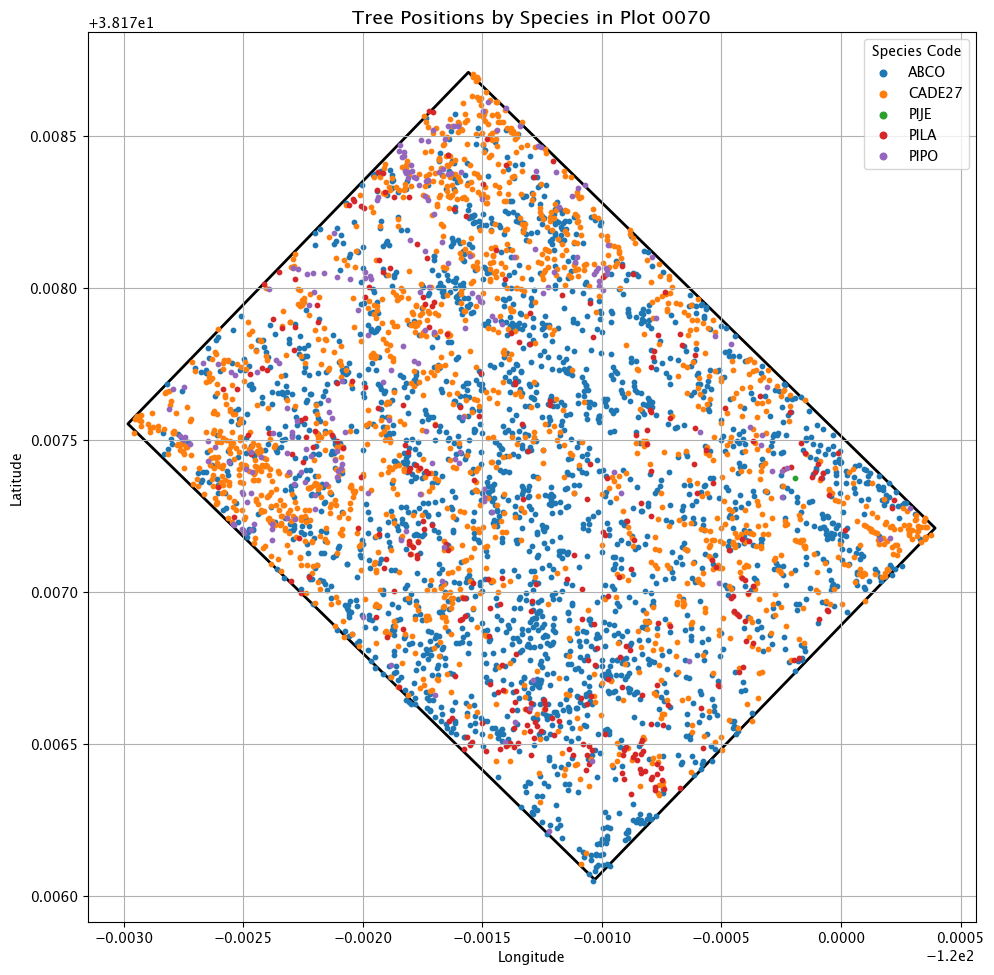

In [36]:
import matplotlib.pyplot as plt

# Filter the data
trees = tree_70_df.copy()
boundary = large_plots_df[large_plots_df.plot_id == '0070']

# Ensure geometry is set and CRS matches
trees = trees.set_geometry("geometry").set_crs(boundary.crs)

# Set up plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the boundary
boundary.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=2, label='Plot boundary')

# Group trees by species_code and plot each with a different color
for species, group in trees.groupby("species_code"):
    group.plot(ax=ax, markersize=10, label=species)

# Customize plot
ax.set_title("Tree Positions by Species in Plot 0070", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(title="Species Code", loc="best", markerscale=1.5)
plt.grid(True)
plt.tight_layout()
plt.show()
